In [1]:
import pandas as pd
import numpy as np

significant_links=pd.read_csv('../significant_links.txt',sep='\t')

gene_expression_matrix=np.log2(pd.read_csv('../norm_counts.txt',
                                           sep=',',index_col=0,header=0)+1)

DEG_analysis=pd.read_csv('../DESeq2.result',
                                sep=',',header=0,index_col=0)
GroupI_specific_genes=set(DEG_analysis[(DEG_analysis['log2FoldChange']<0)&(DEG_analysis['padj']<=0.05)].index)
GroupII_specific_genes=set(DEG_analysis[(DEG_analysis['log2FoldChange']>0)&(DEG_analysis['padj']<=0.05)].index)

df=pd.read_csv('../epigenetic_regulators.txt',sep='\t')
epigenetic_regulators=set(df['Protein'])
diff_epigenetic_regulators=list(set(DEG_analysis[DEG_analysis['padj']<=0.05].index)&epigenetic_regulators)

TF_list_df=pd.read_csv('../TFs_list_from_tfcheckpoints.txt',sep='\t')
TF_list=set(TF_list_df['Gene_symbol'])
GroupI_specific_TFs=list(TF_list&GroupI_specific_genes)
GroupII_specific_TFs=list(TF_list&GroupII_specific_genes)

In [2]:
regulator_degree=[]
with open('../regulator_degree.txt') as infile:
    for i in infile:
        regulator_degree.append(int(i))
        
target_degree=[]
with open('../target_degrees.txt') as infile:
    for i in infile:
        target_degree.append(int(i))        



In [3]:
core_TF_significant_links=pd.read_csv('../core_TF_networks.txt',sep='\t')
core_TF_significant_links

,source,target
0,TSHZ2,HOXB8
1,TSHZ2,HOXA1
2,TSHZ2,HOXB5
3,TSHZ2,HOXB9
4,TSHZ2,HOXB2
5,TSHZ2,HOXB3
6,TSHZ2,HOXB6
7,HOXB8,HES6
8,HOXB8,INSM1
9,HOXB8,HOXC10


In [4]:
degrees_df=pd.read_csv('../degrees.txt',sep='\t',index_col=0)
degrees_df

,rank,degree,shape
ELF5,0,3,^
NHLH2,1,3,^
IRX6,2,11,^
EBF2,3,13,^
NFATC3,4,42,^
NFAT5,5,50,^
TEF,6,50,^
SMARCD3,7,98,*
NKX2-1,8,100,^
ETV1,9,120,^


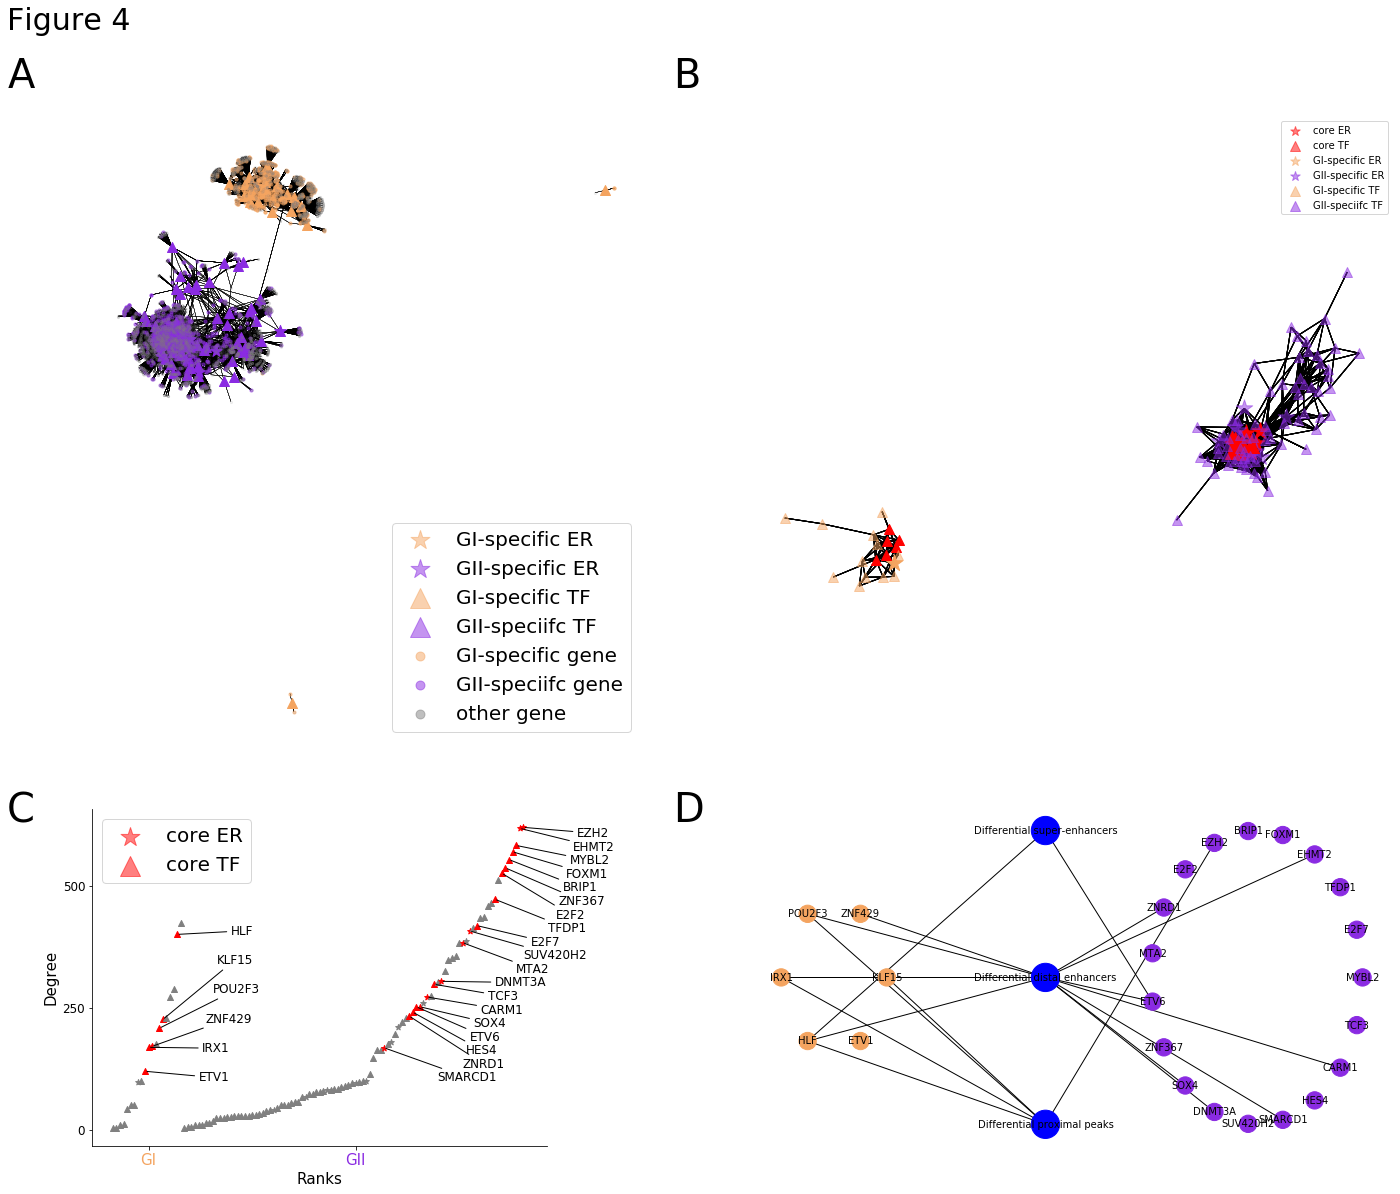

In [8]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import networkx as nx
import pandas as pd
import numpy as np
import scipy.stats


fig=plt.figure(figsize=(25,20))
#-----------------------------
fig.text(0.13,0.86,'A',size=40)
fig.text(0.5,0.86,'B',size=40)
fig.text(0.13,0.35,'C',size=40)
fig.text(0.5,0.35,'D',size=40)

fig.text(0.13,0.9,'Figure 4',size=30)

gs=mpl.gridspec.GridSpec(19,15)

ax=plt.subplot(gs[1:12,1:7])

nodes1=set()
nodes2=set()
edges=[]

for i,j in zip(significant_links['source'],significant_links['target']):
    nodes1.add(i)
    nodes2.add(j)
    edges.append((i,j))


G=nx.Graph()
G.add_nodes_from(nodes1)
G.add_nodes_from(nodes2)

G.add_edges_from(edges)

colors=[]
sizes=[]
shapes=[]

GI_genes=[]
GII_genes=[]
others=[]
for i in G.nodes():
    if i in nodes1:
        sizes.append(100)
        if i in diff_epigenetic_regulators:
            shapes.append('*')
            colors.append('red')
        elif i in GroupII_specific_TFs:
            shapes.append('^')            
            colors.append('indigo')
        elif i in GroupI_specific_TFs:
            shapes.append('^')            
            colors.append('yellow')        
    elif i in nodes2:
        sizes.append(20)
        if i in GroupI_specific_genes:
            GI_genes.append(i)
            colors.append('sandybrown')
            shapes.append('o')                        
        elif i in GroupII_specific_genes:
            GII_genes.append(i)
            colors.append('blueviolet')
            shapes.append('o')                                    
        else:
            others.append(i)
            colors.append('grey')
            shapes.append('o')                        
            
pos=nx.spring_layout(G,seed=140013)

nx.draw(G,pos,ax=ax,nodelist=set(diff_epigenetic_regulators)&GroupII_specific_genes,node_size=150,node_color='blueviolet',node_shape='*',width=0.25)
nx.draw(G,pos,ax=ax,nodelist=set(diff_epigenetic_regulators)&GroupI_specific_genes,node_size=150,node_color='sandybrown',node_shape='*',width=0.25)

nx.draw(G,pos,ax=ax,nodelist=GroupII_specific_TFs,node_size=100,node_color='blueviolet',node_shape='^',width=0.25)
nx.draw(G,pos,ax=ax,nodelist=GroupI_specific_TFs,node_size=100,node_color='sandybrown',node_shape='^',width=0.25)

nx.draw(G,pos,ax=ax,nodelist=GI_genes,node_size=10,node_color='sandybrown',node_shape='o',alpha=0.5,width=0.25)
nx.draw(G,pos,ax=ax,nodelist=GII_genes,node_size=10,node_color='blueviolet',node_shape='o',alpha=0.5,width=0.25)
nx.draw(G,pos,ax=ax,nodelist=others,node_size=5,node_color='grey',node_shape='o',alpha=0.1,width=0.25)

plt.legend(handles=[plt.scatter([],[],c='sandybrown',label='GI-specific ER',marker='*',s=100,alpha=0.5),
                    plt.scatter([],[],c='blueviolet',label='GII-specific ER',marker='*',s=100,alpha=0.5),
                    plt.scatter([],[],c='sandybrown',label='GI-specific TF',marker='^',s=100,alpha=0.5),
                    plt.scatter([],[],c='blueviolet',label='GII-speciifc TF',marker='^',s=100,alpha=0.5),
                    plt.scatter([],[],c='sandybrown',label='GI-specific gene',marker='o',s=20,alpha=0.5),
                    plt.scatter([],[],c='blueviolet',label='GII-speciifc gene',marker='o',s=20,alpha=0.5),
                    plt.scatter([],[],c='grey',label='other gene',marker='o',s=20,alpha=0.5),],fontsize=20,
                    markerscale=2)
                   

ax=plt.subplot(gs[1:12,8:15])


nodes1=set()
edges1=[]
for i,j in zip(core_TF_significant_links['source'],core_TF_significant_links['target']):
    nodes1.add(i)
    nodes1.add(j)
    edges1.append([i,j])
    
GI_core_regulators=set(['ETV1','ZNF429','HLF','POU2F3','KLF15','IRX1'])
GII_core_regulators=set(['EZH2','EHMT2','FOXM1','ZNRD1','MYBL2','ZNF367','BRIP1','E2F2','SOX4','HES4','TFDP1',
                         'DNMT3A','SUV420H2','TCF3','E2F7','CARM1','MTA2','SMARCD1','ETV6'])

G=nx.Graph()
G.add_nodes_from(nodes1)
G.add_edges_from(edges1)

pos=nx.spring_layout(G,seed=111)

nx.draw(G,pos,ax=ax,nodelist=set([i for i in diff_epigenetic_regulators if i in nodes1 and i in GII_core_regulators])-set(['SMARCD3']),
        node_size=300,node_color='red',node_shape='*')
nx.draw(G,pos,ax=ax,nodelist=set([i for i in diff_epigenetic_regulators if i in nodes1 and i not in GII_core_regulators])-set(['SMARCD3']),
        node_size=300,node_color='blueviolet',node_shape='*',alpha=0.5)
nx.draw(G,pos,ax=ax,nodelist=set(['SMARCD3']),
        node_size=300,node_color='sandybrown',node_shape='*')

nx.draw(G,pos,ax=ax,nodelist=[i for i in GroupII_specific_TFs if i in nodes1 and i in GII_core_regulators],
        node_size=100,node_color='red',node_shape='^')
nx.draw(G,pos,ax=ax,nodelist=[i for i in GroupII_specific_TFs if i in nodes1 and i not in GII_core_regulators],
        node_size=100,node_color='blueviolet',node_shape='^',alpha=0.5)

nx.draw(G,pos,ax=ax,nodelist=[i for i in GroupI_specific_TFs if i in nodes1 and i in GI_core_regulators],
        node_size=100,node_color='red',node_shape='^')
nx.draw(G,pos,ax=ax,nodelist=[i for i in GroupI_specific_TFs if i in nodes1 and i not in GI_core_regulators],
        node_size=100,node_color='sandybrown',node_shape='^',alpha=0.5)

plt.legend(handles=[plt.scatter([],[],c='red',label='core ER',marker='*',s=100,alpha=0.5),
                    plt.scatter([],[],c='red',label='core TF',marker='^',s=100,alpha=0.5),
                    plt.scatter([],[],c='sandybrown',label='GI-specific ER',marker='*',s=100,alpha=0.5),
                    plt.scatter([],[],c='blueviolet',label='GII-specific ER',marker='*',s=100,alpha=0.5),
                    plt.scatter([],[],c='sandybrown',label='GI-specific TF',marker='^',s=100,alpha=0.5),
                    plt.scatter([],[],c='blueviolet',label='GII-speciifc TF',marker='^',s=100,alpha=0.5)],
                    markerscale=1)
plt.axis('equal')

ax=plt.subplot(gs[13:19,1:6])

important_regulators=['IRX1','HLF','POU2F3','ZNF429','KLF15','ETV1','EHMT2','EZH2','DNMT3A','ZNRD1','FOXM1','MYBL2','E2F2','ZNF367','BRIP1','HES4','TFDP1','TCF3','SUV420H2','SOX4','E2F7','ETV6','SMARCD1','CARM1','MTA2']

for i,j,k,l in zip(degrees_df['rank'],degrees_df['degree'],degrees_df['shape'],degrees_df.index):
    if l in important_regulators:
        plt.scatter(i,j,marker=k,c='red')
    else:
        plt.scatter(i,j,marker=k,c='grey')
        
GI_regulators=['ETV1','IRX1','ZNF429','POU2F3','KLF15','HLF']
ys=np.linspace(100,400,len(GI_regulators))
for i,j in zip(ys,GI_regulators):
    x,y=degrees_df.loc[j,['rank','degree']]
    plt.annotate(j,
                 xy=(x,y),
                 xytext=(x+15,i),
                 arrowprops=dict(facecolor='black',arrowstyle='-'),ha='left',color='black',
                 size=12)
    
GII_regulators=['SMARCD1','ZNRD1','HES4','ETV6','SOX4','CARM1','TCF3','DNMT3A','MTA2','SUV420H2','E2F7','TFDP1','E2F2','ZNF367','BRIP1','FOXM1','MYBL2','EHMT2','EZH2']
ys=np.linspace(100,600,len(GII_regulators))
for i,j in zip(ys,GII_regulators):
    x,y=degrees_df.loc[j,['rank','degree']]
    plt.annotate(j,
                 xy=(x,y),
                 xytext=(x+15,i),
                 arrowprops=dict(facecolor='black',arrowstyle='-'),ha='left',color='black',
                 size=12)
    
plt.xticks([10,68],
           ['GI','GII'],size=15)
plt.xticks()[1][0].set_color('sandybrown')
plt.xticks()[1][1].set_color('blueviolet')
plt.ylabel('Degree',size=15)
plt.xlabel('Ranks',size=15)
plt.yticks([0,250,500],[0,250,500],size=12)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.legend(handles=[plt.scatter([],[],c='red',label='core ER',marker='*',s=100,alpha=0.5),
                    plt.scatter([],[],c='red',label='core TF',marker='^',s=100,alpha=0.5)],fontsize=20,
                    markerscale=2)
#Figure4-D
ax=plt.subplot(gs[13:19,8:15])

GroupI_specific_core_regulators=set()
GroupII_specific_core_regulators=set()
with open('../GI_core_regulators.txt') as infile:    
    for line in infile:
        GroupI_specific_core_regulators.add(line.strip())
with open('../GII_core_regulators.txt') as infile:
    for line in infile:
        GroupII_specific_core_regulators.add(line.strip())
        
edges_list=[]
with open('../edges.txt') as infile:
    for line in infile:
        s,t=line.strip().split('\t')
        edges_list.append((s,t))
differential_elements=set(['Differential super-enhancers',
                           'Differential distal enhancers',
                           'Differential proximal peaks'])
    
def create_circular_pos(ox=0,oy=0,start=0,end=2*np.pi,num_of_pos=10,r=1):
    theta=np.linspace(start,end,num_of_pos)
    x=ox+np.cos(theta)*r
    y=oy+np.sin(theta)*r
    return [(i,j) for i,j in zip(x,y)]

G=nx.Graph()
G.add_nodes_from(GroupI_specific_core_regulators)
G.add_nodes_from(GroupII_specific_core_regulators)
G.add_nodes_from(differential_elements)
G.add_edges_from(edges_list)

colors=[]
sizes=[]
labels={}
for i in G.nodes():
    if i in GroupI_specific_core_regulators:
        labels[i]=i
        sizes.append(300)
        colors.append('sandybrown')
    elif i in GroupII_specific_core_regulators:
        labels[i]=i
        sizes.append(300)
        colors.append('blueviolet')
    else:        
        labels[i]=i
        sizes.append(800)
        colors.append('blue')
        
pos={}
for v,p in zip(list(GroupI_specific_core_regulators),create_circular_pos(-2,0,0,2*np.pi,len(GroupI_specific_core_regulators)+1,0.5)):
    pos[v]=p
    
for v,p in zip(list(GroupII_specific_core_regulators),create_circular_pos(2,0,0,2*np.pi,len(GroupII_specific_core_regulators)+1)):
    pos[v]=p   
    
pos['Differential super-enhancers']=(0,1)
pos['Differential distal enhancers']=(0,0)
pos['Differential proximal peaks']=(0,-1)


nx.draw(G,pos,ax=ax,node_size=sizes,node_color=colors,labels=labels,font_color='black',font_size=10)

plt.savefig('../Figure4.pdf',bbox_inches='tight')


plt.show()


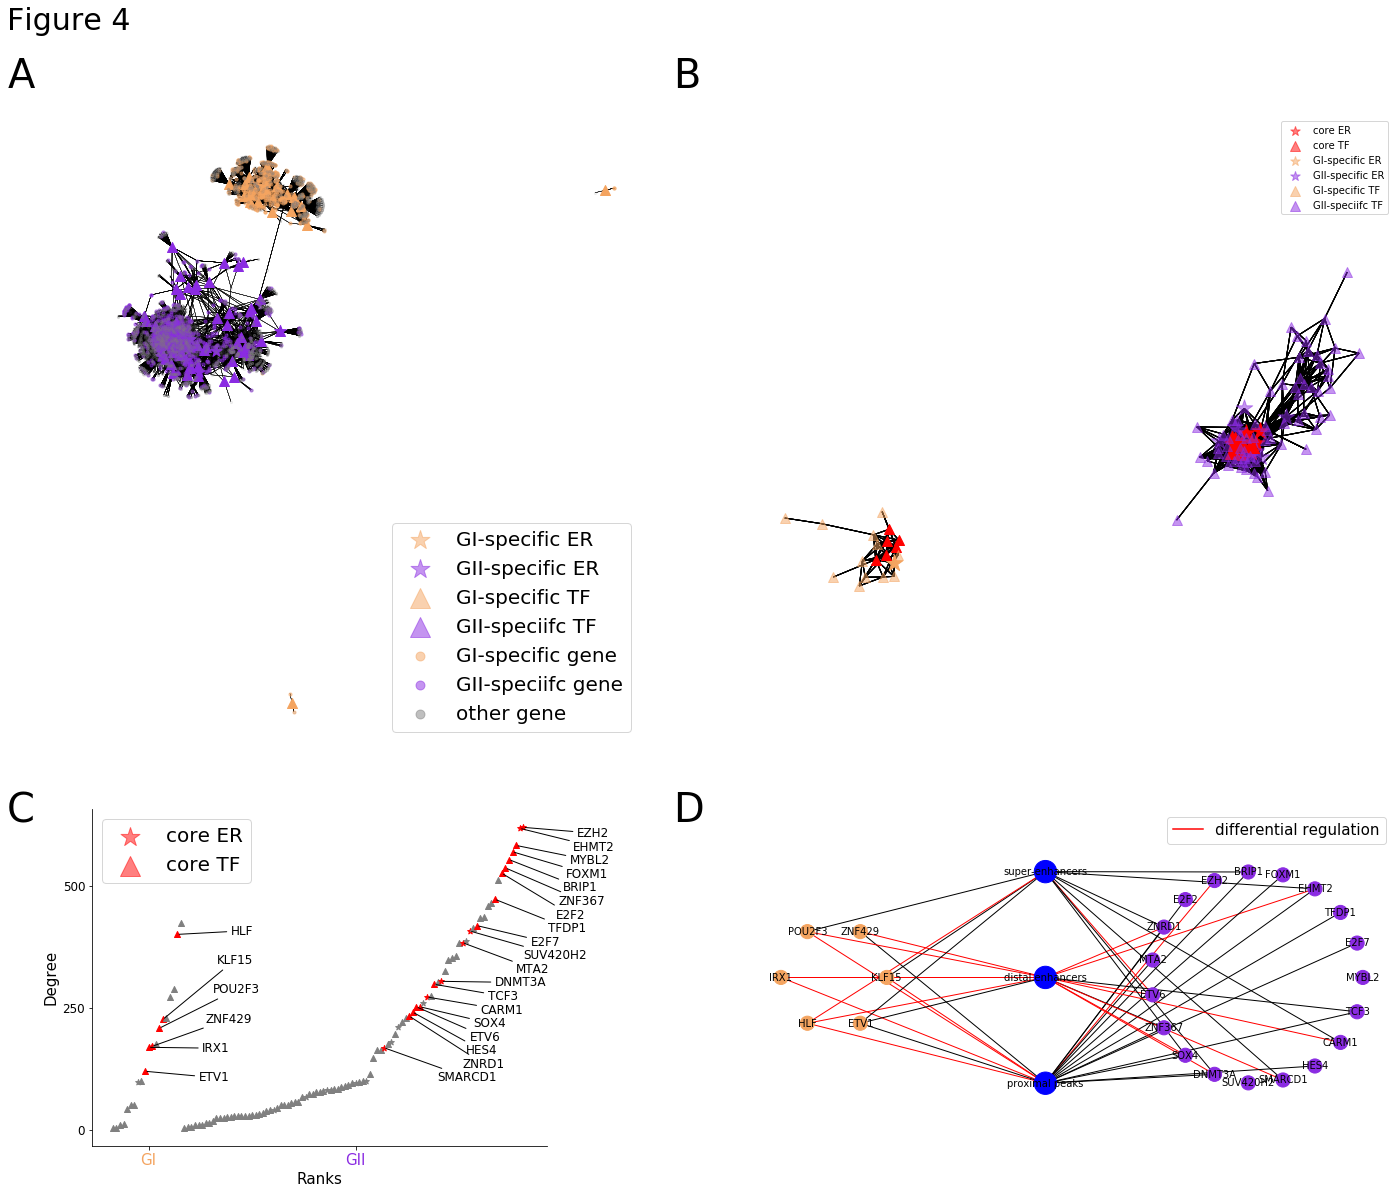

In [9]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import networkx as nx
import pandas as pd
import numpy as np
import scipy.stats


fig=plt.figure(figsize=(25,20))
#-----------------------------
fig.text(0.13,0.86,'A',size=40)
fig.text(0.5,0.86,'B',size=40)
fig.text(0.13,0.35,'C',size=40)
fig.text(0.5,0.35,'D',size=40)

fig.text(0.13,0.9,'Figure 4',size=30)

gs=mpl.gridspec.GridSpec(19,15)

ax=plt.subplot(gs[1:12,1:7])

nodes1=set()
nodes2=set()
edges=[]

for i,j in zip(significant_links['source'],significant_links['target']):
    nodes1.add(i)
    nodes2.add(j)
    edges.append((i,j))


G=nx.Graph()
G.add_nodes_from(nodes1)
G.add_nodes_from(nodes2)

G.add_edges_from(edges)

colors=[]
sizes=[]
shapes=[]

GI_genes=[]
GII_genes=[]
others=[]
for i in G.nodes():
    if i in nodes1:
        sizes.append(100)
        if i in diff_epigenetic_regulators:
            shapes.append('*')
            colors.append('red')
        elif i in GroupII_specific_TFs:
            shapes.append('^')            
            colors.append('indigo')
        elif i in GroupI_specific_TFs:
            shapes.append('^')            
            colors.append('yellow')        
    elif i in nodes2:
        sizes.append(20)
        if i in GroupI_specific_genes:
            GI_genes.append(i)
            colors.append('sandybrown')
            shapes.append('o')                        
        elif i in GroupII_specific_genes:
            GII_genes.append(i)
            colors.append('blueviolet')
            shapes.append('o')                                    
        else:
            others.append(i)
            colors.append('grey')
            shapes.append('o')                        
            
pos=nx.spring_layout(G,seed=140013)

nx.draw(G,pos,ax=ax,nodelist=set(diff_epigenetic_regulators)&GroupII_specific_genes,node_size=150,node_color='blueviolet',node_shape='*',width=0.25)
nx.draw(G,pos,ax=ax,nodelist=set(diff_epigenetic_regulators)&GroupI_specific_genes,node_size=150,node_color='sandybrown',node_shape='*',width=0.25)

nx.draw(G,pos,ax=ax,nodelist=GroupII_specific_TFs,node_size=100,node_color='blueviolet',node_shape='^',width=0.25)
nx.draw(G,pos,ax=ax,nodelist=GroupI_specific_TFs,node_size=100,node_color='sandybrown',node_shape='^',width=0.25)

nx.draw(G,pos,ax=ax,nodelist=GI_genes,node_size=10,node_color='sandybrown',node_shape='o',alpha=0.5,width=0.25)
nx.draw(G,pos,ax=ax,nodelist=GII_genes,node_size=10,node_color='blueviolet',node_shape='o',alpha=0.5,width=0.25)
nx.draw(G,pos,ax=ax,nodelist=others,node_size=5,node_color='grey',node_shape='o',alpha=0.1,width=0.25)

plt.legend(handles=[plt.scatter([],[],c='sandybrown',label='GI-specific ER',marker='*',s=100,alpha=0.5),
                    plt.scatter([],[],c='blueviolet',label='GII-specific ER',marker='*',s=100,alpha=0.5),
                    plt.scatter([],[],c='sandybrown',label='GI-specific TF',marker='^',s=100,alpha=0.5),
                    plt.scatter([],[],c='blueviolet',label='GII-speciifc TF',marker='^',s=100,alpha=0.5),
                    plt.scatter([],[],c='sandybrown',label='GI-specific gene',marker='o',s=20,alpha=0.5),
                    plt.scatter([],[],c='blueviolet',label='GII-speciifc gene',marker='o',s=20,alpha=0.5),
                    plt.scatter([],[],c='grey',label='other gene',marker='o',s=20,alpha=0.5),],fontsize=20,
                    markerscale=2)
                   

ax=plt.subplot(gs[1:12,8:15])


nodes1=set()
edges1=[]
for i,j in zip(core_TF_significant_links['source'],core_TF_significant_links['target']):
    nodes1.add(i)
    nodes1.add(j)
    edges1.append([i,j])
    
GI_core_regulators=set(['ETV1','ZNF429','HLF','POU2F3','KLF15','IRX1'])
GII_core_regulators=set(['EZH2','EHMT2','FOXM1','ZNRD1','MYBL2','ZNF367','BRIP1','E2F2','SOX4','HES4','TFDP1',
                         'DNMT3A','SUV420H2','TCF3','E2F7','CARM1','MTA2','SMARCD1','ETV6'])

G=nx.Graph()
G.add_nodes_from(nodes1)
G.add_edges_from(edges1)

pos=nx.spring_layout(G,seed=111)

nx.draw(G,pos,ax=ax,nodelist=set([i for i in diff_epigenetic_regulators if i in nodes1 and i in GII_core_regulators])-set(['SMARCD3']),
        node_size=300,node_color='red',node_shape='*')
nx.draw(G,pos,ax=ax,nodelist=set([i for i in diff_epigenetic_regulators if i in nodes1 and i not in GII_core_regulators])-set(['SMARCD3']),
        node_size=300,node_color='blueviolet',node_shape='*',alpha=0.5)
nx.draw(G,pos,ax=ax,nodelist=set(['SMARCD3']),
        node_size=300,node_color='sandybrown',node_shape='*')

nx.draw(G,pos,ax=ax,nodelist=[i for i in GroupII_specific_TFs if i in nodes1 and i in GII_core_regulators],
        node_size=100,node_color='red',node_shape='^')
nx.draw(G,pos,ax=ax,nodelist=[i for i in GroupII_specific_TFs if i in nodes1 and i not in GII_core_regulators],
        node_size=100,node_color='blueviolet',node_shape='^',alpha=0.5)

nx.draw(G,pos,ax=ax,nodelist=[i for i in GroupI_specific_TFs if i in nodes1 and i in GI_core_regulators],
        node_size=100,node_color='red',node_shape='^')
nx.draw(G,pos,ax=ax,nodelist=[i for i in GroupI_specific_TFs if i in nodes1 and i not in GI_core_regulators],
        node_size=100,node_color='sandybrown',node_shape='^',alpha=0.5)

plt.legend(handles=[plt.scatter([],[],c='red',label='core ER',marker='*',s=100,alpha=0.5),
                    plt.scatter([],[],c='red',label='core TF',marker='^',s=100,alpha=0.5),
                    plt.scatter([],[],c='sandybrown',label='GI-specific ER',marker='*',s=100,alpha=0.5),
                    plt.scatter([],[],c='blueviolet',label='GII-specific ER',marker='*',s=100,alpha=0.5),
                    plt.scatter([],[],c='sandybrown',label='GI-specific TF',marker='^',s=100,alpha=0.5),
                    plt.scatter([],[],c='blueviolet',label='GII-speciifc TF',marker='^',s=100,alpha=0.5)],
                    markerscale=1)
plt.axis('equal')

ax=plt.subplot(gs[13:19,1:6])

important_regulators=['IRX1','HLF','POU2F3','ZNF429','KLF15','ETV1','EHMT2','EZH2','DNMT3A','ZNRD1','FOXM1','MYBL2','E2F2','ZNF367','BRIP1','HES4','TFDP1','TCF3','SUV420H2','SOX4','E2F7','ETV6','SMARCD1','CARM1','MTA2']

for i,j,k,l in zip(degrees_df['rank'],degrees_df['degree'],degrees_df['shape'],degrees_df.index):
    if l in important_regulators:
        plt.scatter(i,j,marker=k,c='red')
    else:
        plt.scatter(i,j,marker=k,c='grey')
        
GI_regulators=['ETV1','IRX1','ZNF429','POU2F3','KLF15','HLF']
ys=np.linspace(100,400,len(GI_regulators))
for i,j in zip(ys,GI_regulators):
    x,y=degrees_df.loc[j,['rank','degree']]
    plt.annotate(j,
                 xy=(x,y),
                 xytext=(x+15,i),
                 arrowprops=dict(facecolor='black',arrowstyle='-'),ha='left',color='black',
                 size=12)
    
GII_regulators=['SMARCD1','ZNRD1','HES4','ETV6','SOX4','CARM1','TCF3','DNMT3A','MTA2','SUV420H2','E2F7','TFDP1','E2F2','ZNF367','BRIP1','FOXM1','MYBL2','EHMT2','EZH2']
ys=np.linspace(100,600,len(GII_regulators))
for i,j in zip(ys,GII_regulators):
    x,y=degrees_df.loc[j,['rank','degree']]
    plt.annotate(j,
                 xy=(x,y),
                 xytext=(x+15,i),
                 arrowprops=dict(facecolor='black',arrowstyle='-'),ha='left',color='black',
                 size=12)
    
plt.xticks([10,68],
           ['GI','GII'],size=15)
plt.xticks()[1][0].set_color('sandybrown')
plt.xticks()[1][1].set_color('blueviolet')
plt.ylabel('Degree',size=15)
plt.xlabel('Ranks',size=15)
plt.yticks([0,250,500],[0,250,500],size=12)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.legend(handles=[plt.scatter([],[],c='red',label='core ER',marker='*',s=100,alpha=0.5),
                    plt.scatter([],[],c='red',label='core TF',marker='^',s=100,alpha=0.5)],fontsize=20,
                    markerscale=2)
#Figure4-D
ax=plt.subplot(gs[13:19,8:15])

GroupI_specific_core_regulators=set()
GroupII_specific_core_regulators=set()
with open('../GI_core_regulators.txt') as infile:    
    for line in infile:
        GroupI_specific_core_regulators.add(line.strip())
with open('../GII_core_regulators.txt') as infile:
    for line in infile:
        GroupII_specific_core_regulators.add(line.strip())
        
differential_edges=[]
non_differential_edges=[]
with open('../differential_edges.txt') as infile:
    for line in infile:
        s,t=line.strip().split('\t')
        differential_edges.append((s,t))
with open('../non_differential_edges.txt') as infile:
    for line in infile:
        s,t=line.strip().split('\t')
        non_differential_edges.append((s,t))        
differential_elements=set(['super-enhancers',
                           'distal enhancers',
                           'proximal peaks'])
    
def create_circular_pos(ox=0,oy=0,start=0,end=2*np.pi,num_of_pos=10,r=1):
    theta=np.linspace(start,end,num_of_pos)
    x=ox+np.cos(theta)*r
    y=oy+np.sin(theta)*r
    return [(i,j) for i,j in zip(x,y)]

G=nx.Graph()
G.add_nodes_from(GroupI_specific_core_regulators)
G.add_nodes_from(GroupII_specific_core_regulators)
G.add_nodes_from(differential_elements)
G.add_edges_from(non_differential_edges+differential_edges)

colors=[]
sizes=[]
labels={}
for i in G.nodes():
    if i in GroupI_specific_core_regulators:
        labels[i]=i
        sizes.append(200)
        colors.append('sandybrown')
    elif i in GroupII_specific_core_regulators:
        labels[i]=i
        sizes.append(200)
        colors.append('blueviolet')
    else:        
        labels[i]=i
        sizes.append(500)
        colors.append('blue')
        
edge_colors=[]
for i in G.edges():
    if (i[1],i[0]) in differential_edges:
        edge_colors.append('red')
    else:
        edge_colors.append('black')
        
        
        
pos={}
for v,p in zip(list(GroupI_specific_core_regulators),create_circular_pos(-2,0,0,2*np.pi,len(GroupI_specific_core_regulators)+1,0.5)):
    pos[v]=p
    
for v,p in zip(list(GroupII_specific_core_regulators),create_circular_pos(2,0,0,2*np.pi,len(GroupII_specific_core_regulators)+1)):
    pos[v]=p   
    
pos['super-enhancers']=(0,1)
pos['distal enhancers']=(0,0)
pos['proximal peaks']=(0,-1)


nx.draw(G,pos,ax=ax,node_size=sizes,node_color=colors,labels=labels,font_color='black',edge_color=edge_colors,font_size=10)
plt.axis('equal')

plt.legend(handles=[plt.plot([],[],c='red',label='differential regulation')[0]],
                    markerscale=5,fontsize=15)

plt.savefig('../Figure4.pdf',bbox_inches='tight')


plt.show()


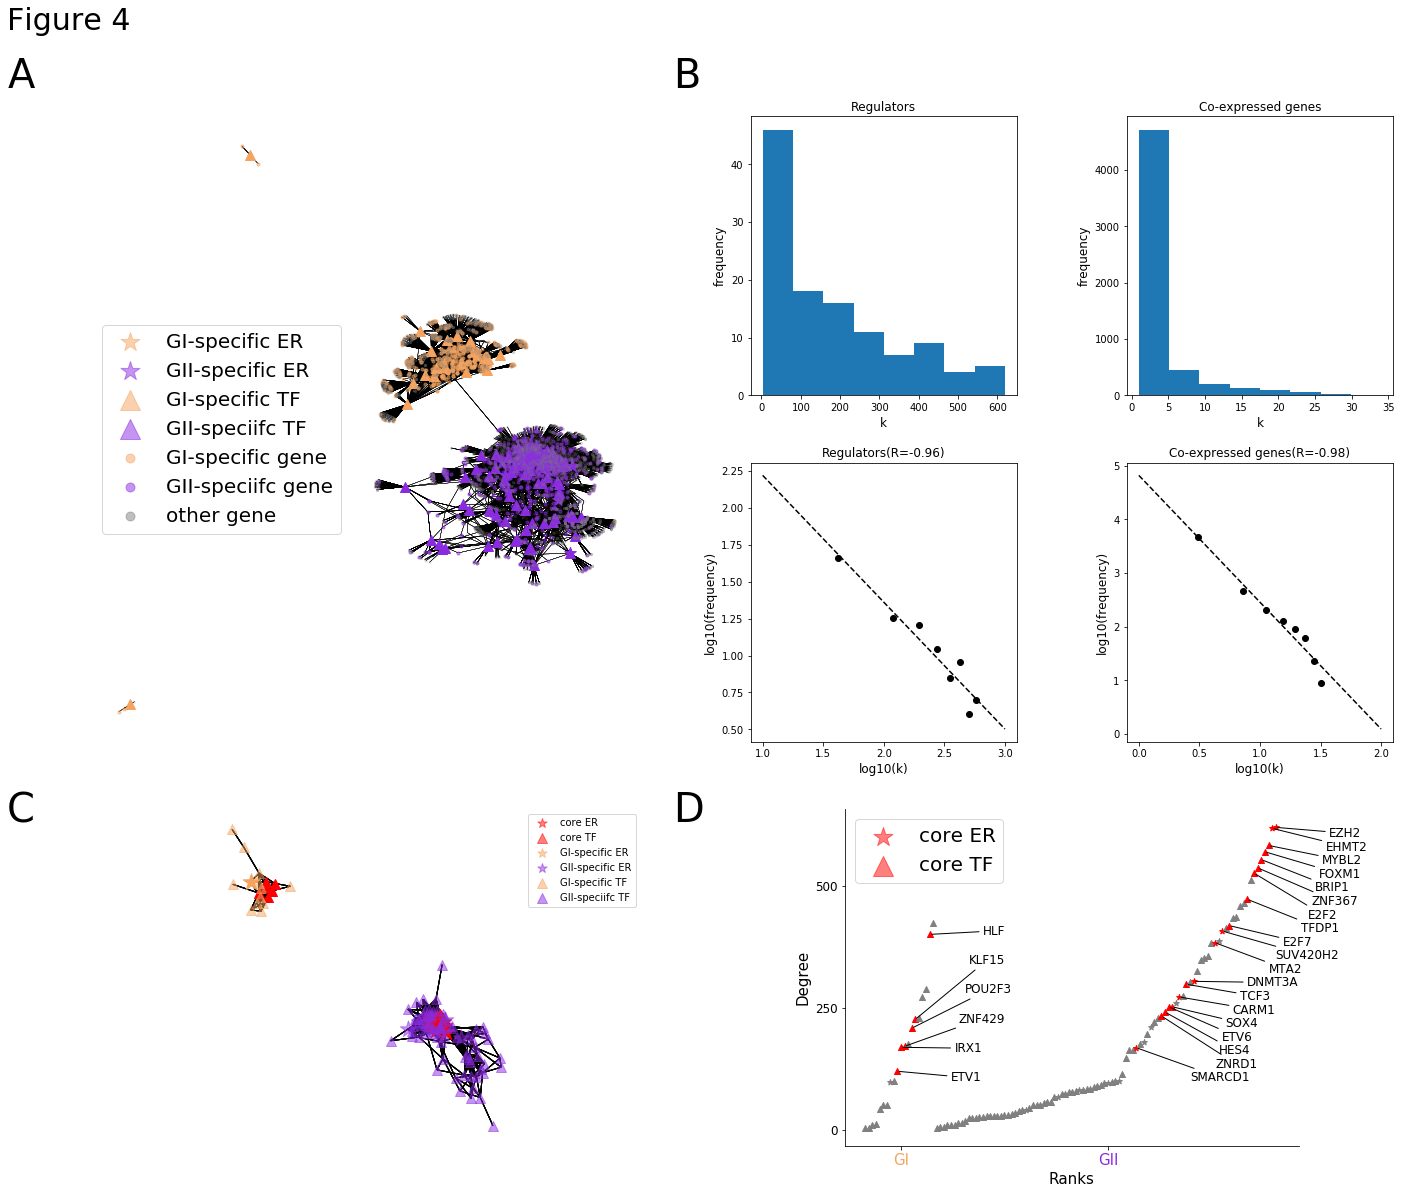

In [44]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import networkx as nx
import pandas as pd
import numpy as np
import scipy.stats


fig=plt.figure(figsize=(25,20))
#-----------------------------
fig.text(0.13,0.86,'A',size=40)
fig.text(0.5,0.86,'B',size=40)
fig.text(0.13,0.35,'C',size=40)
fig.text(0.5,0.35,'D',size=40)

fig.text(0.13,0.9,'Figure 4',size=30)

gs=mpl.gridspec.GridSpec(19,15)

ax=plt.subplot(gs[1:12,1:7])

nodes1=set()
nodes2=set()
edges=[]

for i,j in zip(significant_links['source'],significant_links['target']):
    nodes1.add(i)
    nodes2.add(j)
    edges.append((i,j))


G=nx.Graph()
G.add_nodes_from(nodes1)
G.add_nodes_from(nodes2)

G.add_edges_from(edges)

colors=[]
sizes=[]
shapes=[]

GI_genes=[]
GII_genes=[]
others=[]
for i in G.nodes():
    if i in nodes1:
        sizes.append(100)
        if i in diff_epigenetic_regulators:
            shapes.append('*')
            colors.append('red')
        elif i in GroupII_specific_TFs:
            shapes.append('^')            
            colors.append('indigo')
        elif i in GroupI_specific_TFs:
            shapes.append('^')            
            colors.append('yellow')        
    elif i in nodes2:
        sizes.append(20)
        if i in GroupI_specific_genes:
            GI_genes.append(i)
            colors.append('sandybrown')
            shapes.append('o')                        
        elif i in GroupII_specific_genes:
            GII_genes.append(i)
            colors.append('blueviolet')
            shapes.append('o')                                    
        else:
            others.append(i)
            colors.append('grey')
            shapes.append('o')                        
            
pos=nx.spring_layout(G,seed=14003)

nx.draw(G,pos,ax=ax,nodelist=set(diff_epigenetic_regulators)&GroupII_specific_genes,node_size=150,node_color='blueviolet',node_shape='*',width=0.25)
nx.draw(G,pos,ax=ax,nodelist=set(diff_epigenetic_regulators)&GroupI_specific_genes,node_size=150,node_color='sandybrown',node_shape='*',width=0.25)

nx.draw(G,pos,ax=ax,nodelist=GroupII_specific_TFs,node_size=100,node_color='blueviolet',node_shape='^',width=0.25)
nx.draw(G,pos,ax=ax,nodelist=GroupI_specific_TFs,node_size=100,node_color='sandybrown',node_shape='^',width=0.25)

nx.draw(G,pos,ax=ax,nodelist=GI_genes,node_size=10,node_color='sandybrown',node_shape='o',alpha=0.5,width=0.25)
nx.draw(G,pos,ax=ax,nodelist=GII_genes,node_size=10,node_color='blueviolet',node_shape='o',alpha=0.5,width=0.25)
nx.draw(G,pos,ax=ax,nodelist=others,node_size=5,node_color='grey',node_shape='o',alpha=0.1,width=0.25)

plt.legend(handles=[plt.scatter([],[],c='sandybrown',label='GI-specific ER',marker='*',s=100,alpha=0.5),
                    plt.scatter([],[],c='blueviolet',label='GII-specific ER',marker='*',s=100,alpha=0.5),
                    plt.scatter([],[],c='sandybrown',label='GI-specific TF',marker='^',s=100,alpha=0.5),
                    plt.scatter([],[],c='blueviolet',label='GII-speciifc TF',marker='^',s=100,alpha=0.5),
                    plt.scatter([],[],c='sandybrown',label='GI-specific gene',marker='o',s=20,alpha=0.5),
                    plt.scatter([],[],c='blueviolet',label='GII-speciifc gene',marker='o',s=20,alpha=0.5),
                    plt.scatter([],[],c='grey',label='other gene',marker='o',s=20,alpha=0.5),],fontsize=20,
                    markerscale=2)
                   

ax=plt.subplot(gs[1:6,8:11])

a=plt.hist(regulator_degree,bins=8)
plt.title('Regulators',size=12)
plt.xlabel('k',size=12)
plt.ylabel('frequency',size=12)
ax=plt.subplot(gs[7:12,8:11])
xs=[]
ys=[]
for i,j,k in zip(a[1][:-1],a[1][1:],a[0]):
    plt.scatter(np.log10((j+i)/2),np.log10(k),c='black')
    xs.append(np.log10((j+i)/2))
    ys.append(np.log10(k))
    



x=np.linspace(1,3,100)
slope,intercept,rvalue,pvalue,stderr=scipy.stats.linregress(xs,ys)
y=slope*x+intercept
plt.plot(x,y,color='black',linestyle='dashed')
plt.xlabel('log10(k)',size=12)
plt.ylabel('log10(frequency)',size=12)
plt.title('Regulators(R=%.2f)'%(rvalue),size=12)

ax=plt.subplot(gs[1:6,12:15])

a=plt.hist(target_degree,bins=8)
plt.title('Co-expressed genes',size=12)
plt.xlabel('k',size=12)
plt.ylabel('frequency',size=12)
ax=plt.subplot(gs[7:12,12:15])
xs=[]
ys=[]
for i,j,k in zip(a[1][:-1],a[1][1:],a[0]):
    plt.scatter(np.log10((j+i)/2),np.log10(k),c='black')
    xs.append(np.log10((j+i)/2))
    ys.append(np.log10(k))




x=np.linspace(0,2,100)
slope,intercept,rvalue,pvalue,stderr=scipy.stats.linregress(xs,ys)
y=slope*x+intercept
plt.plot(x,y,color='black',linestyle='dashed')
plt.xlabel('log10(k)',size=12)
plt.ylabel('log10(frequency)',size=12)
plt.title('Co-expressed genes(R=%.2f)'%(rvalue),size=12)

ax=plt.subplot(gs[13:19,1:7])
nodes1=set()
edges1=[]
for i,j in zip(core_TF_significant_links['source'],core_TF_significant_links['target']):
    nodes1.add(i)
    nodes1.add(j)
    edges1.append([i,j])
    
GI_core_regulators=set(['ETV1','ZNF429','HLF','POU2F3','KLF15','IRX1'])
GII_core_regulators=set(['EZH2','EHMT2','FOXM1','ZNRD1','MYBL2','ZNF367','BRIP1','E2F2','SOX4','HES4','TFDP1',
                         'DNMT3A','SUV420H2','TCF3','E2F7','CARM1','MTA2','SMARCD1','ETV6'])

G=nx.Graph()
G.add_nodes_from(nodes1)
G.add_edges_from(edges1)

pos=nx.spring_layout(G,seed=111)

nx.draw(G,pos,ax=ax,nodelist=set([i for i in diff_epigenetic_regulators if i in nodes1 and i in GII_core_regulators])-set(['SMARCD3']),
        node_size=300,node_color='red',node_shape='*')
nx.draw(G,pos,ax=ax,nodelist=set([i for i in diff_epigenetic_regulators if i in nodes1 and i not in GII_core_regulators])-set(['SMARCD3']),
        node_size=300,node_color='blueviolet',node_shape='*',alpha=0.5)
nx.draw(G,pos,ax=ax,nodelist=set(['SMARCD3']),
        node_size=300,node_color='sandybrown',node_shape='*')

nx.draw(G,pos,ax=ax,nodelist=[i for i in GroupII_specific_TFs if i in nodes1 and i in GII_core_regulators],
        node_size=100,node_color='red',node_shape='^')
nx.draw(G,pos,ax=ax,nodelist=[i for i in GroupII_specific_TFs if i in nodes1 and i not in GII_core_regulators],
        node_size=100,node_color='blueviolet',node_shape='^',alpha=0.5)

nx.draw(G,pos,ax=ax,nodelist=[i for i in GroupI_specific_TFs if i in nodes1 and i in GI_core_regulators],
        node_size=100,node_color='red',node_shape='^')
nx.draw(G,pos,ax=ax,nodelist=[i for i in GroupI_specific_TFs if i in nodes1 and i not in GI_core_regulators],
        node_size=100,node_color='sandybrown',node_shape='^',alpha=0.5)

plt.legend(handles=[plt.scatter([],[],c='red',label='core ER',marker='*',s=100,alpha=0.5),
                    plt.scatter([],[],c='red',label='core TF',marker='^',s=100,alpha=0.5),
                    plt.scatter([],[],c='sandybrown',label='GI-specific ER',marker='*',s=100,alpha=0.5),
                    plt.scatter([],[],c='blueviolet',label='GII-specific ER',marker='*',s=100,alpha=0.5),
                    plt.scatter([],[],c='sandybrown',label='GI-specific TF',marker='^',s=100,alpha=0.5),
                    plt.scatter([],[],c='blueviolet',label='GII-speciifc TF',marker='^',s=100,alpha=0.5)],
                    markerscale=1)
plt.axis('equal')


ax=plt.subplot(gs[13:19,9:14])
important_regulators=['IRX1','HLF','POU2F3','ZNF429','KLF15','ETV1','EHMT2','EZH2','DNMT3A','ZNRD1','FOXM1','MYBL2','E2F2','ZNF367','BRIP1','HES4','TFDP1','TCF3','SUV420H2','SOX4','E2F7','ETV6','SMARCD1','CARM1','MTA2']

for i,j,k,l in zip(degrees_df['rank'],degrees_df['degree'],degrees_df['shape'],degrees_df.index):
    if l in important_regulators:
        plt.scatter(i,j,marker=k,c='red')
    else:
        plt.scatter(i,j,marker=k,c='grey')
        
GI_regulators=['ETV1','IRX1','ZNF429','POU2F3','KLF15','HLF']
ys=np.linspace(100,400,len(GI_regulators))
for i,j in zip(ys,GI_regulators):
    x,y=degrees_df.loc[j,['rank','degree']]
    plt.annotate(j,
                 xy=(x,y),
                 xytext=(x+15,i),
                 arrowprops=dict(facecolor='black',arrowstyle='-'),ha='left',color='black',
                 size=12)
    
GII_regulators=['SMARCD1','ZNRD1','HES4','ETV6','SOX4','CARM1','TCF3','DNMT3A','MTA2','SUV420H2','E2F7','TFDP1','E2F2','ZNF367','BRIP1','FOXM1','MYBL2','EHMT2','EZH2']
ys=np.linspace(100,600,len(GII_regulators))
for i,j in zip(ys,GII_regulators):
    x,y=degrees_df.loc[j,['rank','degree']]
    plt.annotate(j,
                 xy=(x,y),
                 xytext=(x+15,i),
                 arrowprops=dict(facecolor='black',arrowstyle='-'),ha='left',color='black',
                 size=12)
    
plt.xticks([10,68],
           ['GI','GII'],size=15)
plt.xticks()[1][0].set_color('sandybrown')
plt.xticks()[1][1].set_color('blueviolet')
plt.ylabel('Degree',size=15)
plt.xlabel('Ranks',size=15)
plt.yticks([0,250,500],[0,250,500],size=12)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.legend(handles=[plt.scatter([],[],c='red',label='core ER',marker='*',s=100,alpha=0.5),
                    plt.scatter([],[],c='red',label='core TF',marker='^',s=100,alpha=0.5)],fontsize=20,
                    markerscale=2)

plt.savefig('../Figure4.pdf',bbox_inches='tight')


plt.show()
